# Housing

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nikitaosovskiy/hadnson_ml/blob/main/01-house_price/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/nikitaosovskiy/fork-of-house-price"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Installing data and packages

In [ ]:
!pip install kaggle pandas matplotlib scikit-learn

In [ ]:
import os
import zipfile

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
zip_data_name = 'house-prices-advanced-regression-techniques.zip'
data_folder = 'data'

if not(os.listdir(data_folder)):
    !kaggle competitions download -c house-prices-advanced-regression-techniques
    zip_data = zipfile.ZipFile(zip_data_name)
    zip_data.extractall(data_folder)
    !rm {zip_data_name}

# Looking for our data

In [ ]:
def load_data(path):
    csv_path = os.path.join(data_folder, path)
    return pd.read_csv(csv_path)

train_data = load_data('train.csv')
test_data = load_data('test.csv')
test_data_labels = load_data('sample_submission.csv')

In [ ]:
test_data_labels.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


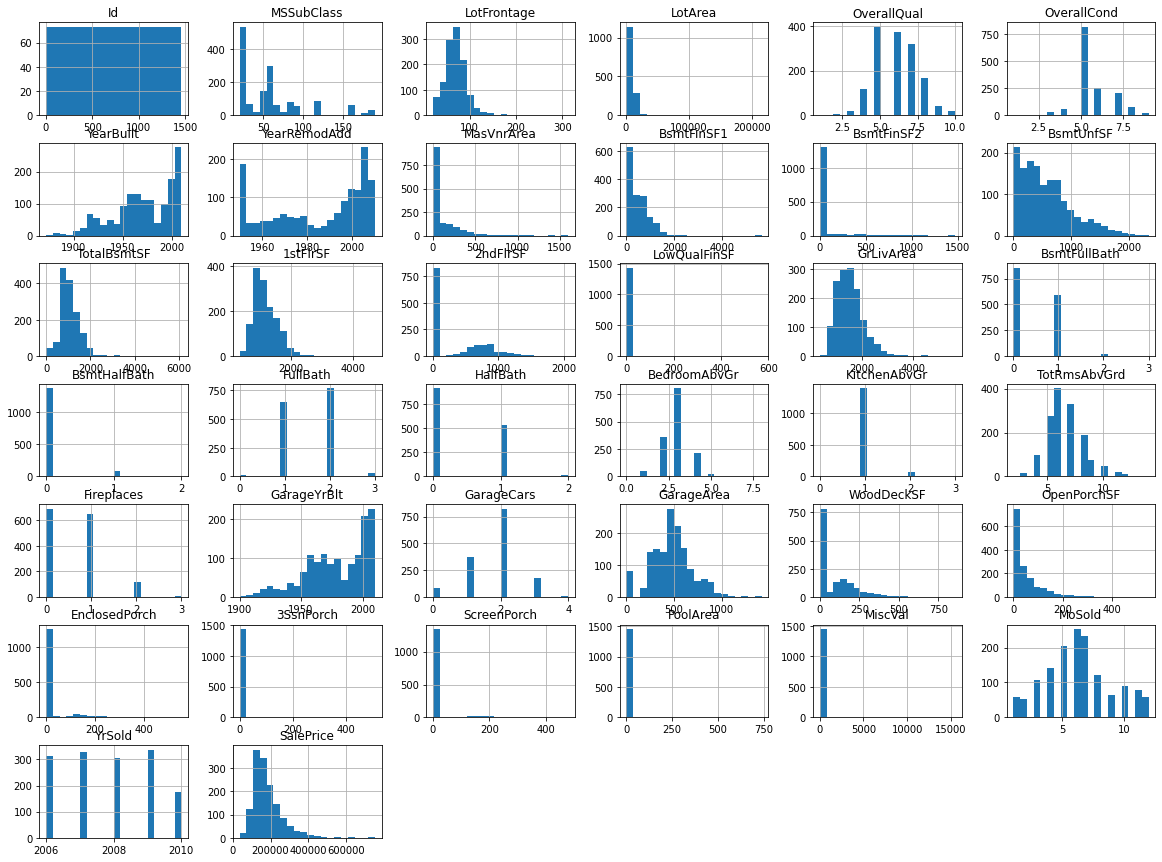

In [ ]:
%matplotlib inline
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
housing = train_data.copy()

housing['repair_age'] = 2022 - train_data['YearRemodAdd']
housing['house_age'] = 2022 - train_data['YearBuilt']

corr_matrix = housing.corr()

corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
repair_age  

# Transform our data

In [ ]:
housing_labels = train_data['SalePrice'].copy()
housing = train_data.drop(['SalePrice', 'Id'], axis=1)

In [ ]:
nums_transform = []
obj_transform = []

for column in housing:
    if housing[column].dtype != 'object':
        nums_transform.append(column)
    else:
        obj_transform.append(column)

In [ ]:
housing.columns.get_loc('YearRemodAdd')

19

In [ ]:
housing.columns.get_loc('YearBuilt')

18

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Special transformator
year_rem_ix, year_built_ix = 19, 18
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        repair_age = 2022 - X[:, year_rem_ix]
        house_age = 2022 - X[:, year_rem_ix]
        return np.c_[X, repair_age, 
                     house_age]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

obj_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
                                       unknown_value=np.nan)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler(with_mean=False))
])

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, nums_transform),
    ('ord', obj_pipeline, obj_transform)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(1460, 81)

In [ ]:
housing_prepared

array([[ 0.07337496, -0.22087509, -0.20714171, ..., 23.05941946,
         5.15607262,  3.63478632],
       [-0.87256276,  0.46031974, -0.09188637, ..., 23.05941946,
         5.15607262,  3.63478632],
       [ 0.07337496, -0.08463612,  0.07347998, ..., 23.05941946,
         5.15607262,  3.63478632],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ..., 23.05941946,
         5.15607262,  3.63478632],
       [-0.87256276, -0.08463612, -0.08016039, ..., 23.05941946,
         5.15607262,  3.63478632],
       [-0.87256276,  0.23325479, -0.05811155, ..., 23.05941946,
         5.15607262,  3.63478632]])

In [ ]:
pd.DataFrame(housing_prepared, columns=nums_transform + ['repair_age', 'house_age'] + 
             obj_transform)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.568420,1.264455,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0.568420,1.264455,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.568420,1.264455,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,2.842102,2.528910,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,0.000000
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.568420,1.264455,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,0.568420,1.264455,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786
1456,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,0.568420,2.528910,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786
1457,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,0.568420,1.264455,6.734608,7.872107,4.028832,17.089178,0.000000,23.059419,5.156073,3.634786
1458,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,...,0.568420,2.528910,6.734608,7.872107,4.028832,17.089178,4.540719,23.059419,5.156073,3.634786


I had a problem with number of columns and should abandon the idea of using 2 ecoders

# Training Model

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [216240.10750179 198325.10750179 216456.10750179 167616.268188
 284662.10750179]
Labels: [208500, 181500, 223500, 140000, 250000]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

29656.95820334259

In [ ]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print('Summ predictions: ', scores)
    print('Average: ', scores.mean())
    print('Standart devation', scores.std())

In [ ]:
lin_scores = cross_val_score(lin_reg,
                        housing_prepared,
                        housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Summ predictions:  [   22472.42203273    35928.45458296    25492.79984563    42061.57929363
    35919.94925389    28524.56893149 16877613.8463524     26642.11228204
    68125.30982859    32612.06629945]
Average:  1719539.3108702824
Standart devation 5052706.482211714


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
scores = cross_val_score(tree_reg,
                        housing_prepared,
                        housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Summ predictions:  [33105.22738913 38062.89818524 29628.55313702 48703.97489467
 40526.09866088 30099.20157522 32355.42442125 42993.5633921
 57982.05897995 33824.86176748]
Average:  38728.18624029585
Standart devation 8634.996025253127


## Random Fores Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10589.29544077652

In [ ]:
print('Predictions:', forest_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [207280.   174554.   219847.53 150538.35 266938.44]
Labels: [208500, 181500, 223500, 140000, 250000]


In [ ]:
forest_scores = cross_val_score(forest_reg,
                        housing_prepared,
                        housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Summ predictions:  [24912.48481929 25420.62079935 21885.01293628 40748.67813271
 32815.43198974 26985.99283633 24374.66180274 24068.53343682
 40631.34873606 27547.4253301 ]
Average:  28939.019081941347
Standart devation 6479.676971052228


# Tuning our model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 100, 300], 'max_features': [3, 10, 30, 100, 300]}
]
     
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

/mnt/d/Projects/weapon_detection/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/mnt/d/Projects/weapon_detection/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/d/Projects/weapon_detection/env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/mnt/d/Projects/weapon_detection/env/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [3, 10, 30, 100, 300],
                          'n_estimators': [3, 10, 30, 100, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 30, 'n_estimators': 100}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],
                             cvres['params']):
    print(np.sqrt(-mean_score), params)

38890.611983273826 {'max_features': 3, 'n_estimators': 3}
34185.79135693598 {'max_features': 3, 'n_estimators': 10}
32890.08908104258 {'max_features': 3, 'n_estimators': 30}
32225.857453320197 {'max_features': 3, 'n_estimators': 100}
31641.185407969064 {'max_features': 3, 'n_estimators': 300}
39243.65256843487 {'max_features': 10, 'n_estimators': 3}
33260.785641141316 {'max_features': 10, 'n_estimators': 10}
29650.59042970806 {'max_features': 10, 'n_estimators': 30}
29469.99810719783 {'max_features': 10, 'n_estimators': 100}
29459.20701462957 {'max_features': 10, 'n_estimators': 300}
36202.782786358504 {'max_features': 30, 'n_estimators': 3}
31494.534166126265 {'max_features': 30, 'n_estimators': 10}
29157.716246074324 {'max_features': 30, 'n_estimators': 30}
28632.31107783699 {'max_features': 30, 'n_estimators': 100}
28934.731459707727 {'max_features': 30, 'n_estimators': 300}
nan {'max_features': 100, 'n_estimators': 3}
nan {'max_features': 100, 'n_estimators': 10}
nan {'max_features

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.31352945e-03, 7.02138645e-03, 1.67337030e-02, 2.87755753e-01,
       4.93882567e-03, 3.85760836e-02, 9.85942457e-03, 9.79613899e-03,
       2.63953636e-02, 7.56594586e-04, 5.96922767e-03, 4.79109325e-02,
       3.76878289e-02, 3.20781665e-02, 2.76850443e-04, 1.16124908e-01,
       2.10371074e-03, 5.22932394e-04, 1.60631286e-02, 1.51723044e-03,
       4.06487368e-03, 9.95583762e-04, 1.24633928e-02, 9.79306047e-03,
       1.33845421e-02, 8.86045021e-02, 3.41910382e-02, 4.04730093e-03,
       5.13803925e-03, 7.11045171e-04, 2.26204346e-04, 1.07659855e-03,
       3.29146967e-04, 1.45810111e-04, 3.90490543e-03, 1.63510185e-03,
       1.31767941e-03, 7.89506622e-04, 2.27219874e-03, 1.83419866e-05,
       1.30026292e-04, 1.28881665e-03, 1.38840305e-03, 8.17675060e-07,
       7.97619585e-04, 9.37377538e-04, 6.46387091e-03, 7.99052413e-04,
       3.47617325e-04, 3.94962497e-04, 1.08313339e-03, 9.64753793e-04,
       5.49920575e-04, 2.34148979e-03, 2.30094911e-03, 1.52150087e-03,
      

In [ ]:
attributes = nums_transform + ['repair_age', 'house_age'] + obj_transform
labeled_future_importances = sorted(zip(feature_importances, attributes), reverse=True)
labeled_future_importances

[(0.28775575262614433, 'OverallQual'),
 (0.11612490832461116, 'GrLivArea'),
 (0.08860450205087483, 'GarageCars'),
 (0.07393998525980877, 'ExterQual'),
 (0.047910932461179105, 'TotalBsmtSF'),
 (0.038576083633422215, 'YearBuilt'),
 (0.03768782886016862, '1stFlrSF'),
 (0.034191038213746264, 'GarageArea'),
 (0.032078166521371965, '2ndFlrSF'),
 (0.0263953636466049, 'BsmtFinSF1'),
 (0.02493093511909042, 'BsmtQual'),
 (0.016733702997088658, 'LotArea'),
 (0.01606312855334301, 'FullBath'),
 (0.013384542124365614, 'GarageYrBlt'),
 (0.012463392805916414, 'TotRmsAbvGrd'),
 (0.01016474958865539, 'KitchenQual'),
 (0.009859424568449005, 'YearRemodAdd'),
 (0.009796138985529428, 'MasVnrArea'),
 (0.009793060467013023, 'Fireplaces'),
 (0.007021386451040302, 'LotFrontage'),
 (0.006463870910273513, 'Neighborhood'),
 (0.005969227667328128, 'BsmtUnfSF'),
 (0.005138039247621539, 'OpenPorchSF'),
 (0.00493882567219115, 'OverallCond'),
 (0.004064873678980406, 'BedroomAbvGr'),
 (0.004047300925308671, 'WoodDeckSF'

# Evaluate our model

In [ ]:
final_model = grid_search.best_estimator_

x_test = test_data.drop(['Id'], axis=1)
y_test = test_data_labels['SalePrice'].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

68857.12354879832

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([65120.21056927, 72401.4164381 ])

# Kaggle result

In [ ]:
final_result = pd.DataFrame(final_predictions, columns=['SalePrice'], index=test_data_labels['Id'])

In [ ]:
final_result

,SalePrice
Id,
1461,124269.75
1462,155654.59
1463,179761.59
1464,181933.94
1465,190172.95
...,...
2915,83945.00
2916,86904.43
2917,160937.96


In [ ]:
final_result.to_csv('result.cvs')

# Exercises

## 1

In [ ]:
from  sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(housing_prepared, housing_labels)

SVR()

In [ ]:
svm_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

10715.895088739837

In [ ]:
svm_scores = cross_val_score(svm_reg,
                        housing_prepared,
                        housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Summ predictions:  [69021.38405975 84105.62482423 81712.50330842 85203.92723483
 98727.6727979  79333.63903188 72453.85680476 71186.07754183
 93827.12245916 73309.70228821]
Average:  80888.15103509654
Standart devation 9387.546204176877


In [ ]:
param_grid = [{'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000.]},
             {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 
              'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'C': 300.0, 'kernel': 'linear'}

In [ ]:
best_svr = grid_search.best_estimator_

In [ ]:
best_svm_predictions = best_svr.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

10715.895088739837

In [ ]:
svr_scores = cross_val_score(best_svr,
                        housing_prepared,
                        housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Summ predictions:  [21287.65506927 28297.04210639 22885.08039209 41010.10392048
 36367.4287316  28008.01735877 25638.43964829 24807.73584054
 64910.34160295 23448.11665312]
Average:  31665.996132351625
Standart devation 12550.092204999528


## 2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.1s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   0.1s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   0.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   0.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   0.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   0.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   0.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   0.1s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   0.1s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   0.1s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   0.1s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   0.1s
[CV] END C=151136.2028

[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   0.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   0.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   0.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   0.1s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   0.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   1.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   0.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   0.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   0.5s
[CV] END C=55.53838911232773, gamma=0.578634378499143, kernel=linear; total time=   0.1s
[CV] END C=55.53838911232773, gamma=0.578634378499143, kernel=linear; total time=   0.1s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55cec19f10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55cec43490>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rnd_nmse = rnd_search.best_score_
rnd_rmse = np.sqrt(-rnd_nmse)
rnd_rmse

31025.651991786446

## 3

In [ ]:
# futures = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'KitchenQual',
#           '1stFlrSF', 'YearBuilt', 'GarageArea', 'ExterQual', 'BsmtQual', 'FullBath',
#           '2ndFlrSF', 'Fireplaces', 'LotArea', 'BsmtFinSF1', 'Foundation', 'GarageYrBlt',
#           'LotFrontage', 'MasVnrArea', 'TotRmsAbvGrd', 'Neighborhood', 'YearRemodAdd', 'GarageFinish']

class MainFuturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, labeled_future_importances, k, attr_type=None):
        self.attr_type = attr_type
        self.labeled_future_importances = labeled_future_importances
        self.k = k
    def fit(self, X, y=None):
        self.attribs = [i[1] for i in labeled_future_importances[:self.k]]
        return self
    def transform(self, X, y=None):
        if self.attr_type == 'object':
            obj_futures = set(obj_transform) & set(self.attribs)
            return X[list(obj_futures)]
        else:
            other_futures = set(nums_transform) & set(self.attribs)
            return X[list(other_futures)]

In [ ]:
k = 20 # number of futures

num_main_pipeline = Pipeline([
    ('main_futures', MainFuturesAdder(labeled_future_importances, k)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

obj_main_pipeline = Pipeline([
    ('main_futures', MainFuturesAdder(labeled_future_importances, k, 'object')),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
                                       unknown_value=np.nan)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler(with_mean=False))
])

In [ ]:
full_main_pipeline = ColumnTransformer([
    ('num', num_main_pipeline, nums_transform),
    ('ord', obj_main_pipeline, obj_transform)
])

main_prepared = full_main_pipeline.fit_transform(housing)

In [ ]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

## 4

In [ ]:
lin_reg = Pipeline([
    ('full_data', full_main_pipeline),
    ('lin_reg', LinearRegression())
])

lin_reg_test = lin_reg.fit(housing, housing_labels)

In [ ]:
print('Predictions: ',lin_reg_test.predict(some_data))
print('Labels: ', list(some_labels))

Predictions:  [206035.39048944 182379.16870785 220942.68939811 224468.29798811
 333160.32349196]
Labels:  [208500, 181500, 223500, 140000, 250000]


## 5